In [103]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV,train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from matplotlib import pyplot as plt
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from pycaret.regression import setup, compare_models
import matplotlib.font_manager
from prophet import Prophet
import numpy as np

In [9]:
# Load your data into a pandas DataFrame
dfPM10 = pd.read_csv('./raw_data/DataExtractPM10.csv')
dfPM10.head(2)

,Country,City,City Code,City Population,Note On Population Data,Air Pollutant,Air Pollutant Description,Year,Month,Air Quality Monthly Average [ug/m3],Data Coverage Of Monthly Average [%],Nr Of Traffic Related Measurements,Nr Of Background Related Measurements,Source Of Data Flow
0,Austria,Wien ...,AT001C1 ...,1766746,Population data from 2014 for city (Eurostat),PM10,Particulate matter < 10 µm (aerosol),2018,(01) January,20.19,99.93,2,11,E1a/validated data AQ e-Reporting
1,Austria,Wien ...,AT001C1 ...,1766746,Population data from 2014 for city (Eurostat),PM10,Particulate matter < 10 µm (aerosol),2018,(02) February,32.28,99.68,2,11,E1a/validated data AQ e-Reporting


In [10]:
dfPM25 = pd.read_csv('./raw_data/DataExtractPM25.csv')
dfPM25.head(2)

,Country,City,City Code,City Population,Note On Population Data,Air Pollutant,Air Pollutant Description,Year,Month,Air Quality Monthly Average [ug/m3],Data Coverage Of Monthly Average [%],Nr Of Traffic Related Measurements,Nr Of Background Related Measurements,Source Of Data Flow
0,Austria,Wien ...,AT001C1 ...,1766746,Population data from 2014 for city (Eurostat),PM2.5,Particulate matter < 2.5 µm (aerosol),2018,(01) January,17.20,99.89,2,4,E1a/validated data AQ e-Reporting
1,Austria,Wien ...,AT001C1 ...,1766746,Population data from 2014 for city (Eurostat),PM2.5,Particulate matter < 2.5 µm (aerosol),2018,(02) February,26.86,99.31,2,4,E1a/validated data AQ e-Reporting


In [11]:
dfconc = pd.concat([dfPM10, dfPM25], axis=0)
dfconc.head(2)

,Country,City,City Code,City Population,Note On Population Data,Air Pollutant,Air Pollutant Description,Year,Month,Air Quality Monthly Average [ug/m3],Data Coverage Of Monthly Average [%],Nr Of Traffic Related Measurements,Nr Of Background Related Measurements,Source Of Data Flow
0,Austria,Wien ...,AT001C1 ...,1766746,Population data from 2014 for city (Eurostat),PM10,Particulate matter < 10 µm (aerosol),2018,(01) January,20.19,99.93,2,11,E1a/validated data AQ e-Reporting
1,Austria,Wien ...,AT001C1 ...,1766746,Population data from 2014 for city (Eurostat),PM10,Particulate matter < 10 µm (aerosol),2018,(02) February,32.28,99.68,2,11,E1a/validated data AQ e-Reporting


In [12]:
import pandas as pd

# Create a new column combining 'year' and 'month'
dfconc['MonthNumber'] = dfconc['Month'].str.extract(r'\((\d+)\)').astype(int)
dfconc['CombinedDate'] = pd.to_datetime(dfconc['Year'].astype(str) + dfconc['MonthNumber'].astype(str), format='%Y%m')

In [13]:
filtered_df = dfconc[(dfconc['City'].str.contains('Torino')) & (dfconc['Year'] == 2023) & (dfconc['Month'] != '(03) March')]
yearly_avg = filtered_df['Air Quality Monthly Average [ug/m3]'].mean()

dfconc.loc[dfconc['Air Quality Monthly Average [ug/m3]'] > 500, 'Air Quality Monthly Average [ug/m3]'] = yearly_avg


In [14]:
partial_match_df = dfconc[dfconc['City'].str.contains("Torino")]
partial_match_df.head(3)

,Country,City,City Code,City Population,Note On Population Data,Air Pollutant,Air Pollutant Description,Year,Month,Air Quality Monthly Average [ug/m3],Data Coverage Of Monthly Average [%],Nr Of Traffic Related Measurements,Nr Of Background Related Measurements,Source Of Data Flow,MonthNumber,CombinedDate
17098,Italy,Torino ...,IT004C1 ...,857910,Population data from 2020 for city (Eurostat),PM2.5,Particulate matter < 2.5 µm (aerosol),2018,(01) January,36.46,97.18,0,1,E1a/validated data AQ e-Reporting,1,2018-01-01
17099,Italy,Torino ...,IT004C1 ...,857910,Population data from 2020 for city (Eurostat),PM2.5,Particulate matter < 2.5 µm (aerosol),2018,(02) February,30.65,98.21,0,1,E1a/validated data AQ e-Reporting,2,2018-02-01
17100,Italy,Torino ...,IT004C1 ...,857910,Population data from 2020 for city (Eurostat),PM2.5,Particulate matter < 2.5 µm (aerosol),2018,(04) April,16.92,79.58,0,1,E1a/validated data AQ e-Reporting,4,2018-04-01


In [15]:
dfpreprocessed = dfconc.drop(columns=['Note On Population Data', 'Air Pollutant Description', 'Year', 'Month', 'MonthNumber','Source Of Data Flow','Data Coverage Of Monthly Average [%]','Nr Of Traffic Related Measurements','Nr Of Background Related Measurements'])
dfpreprocessed

,Country,City,City Code,City Population,Air Pollutant,Air Quality Monthly Average [ug/m3],CombinedDate
0,Austria,Wien ...,AT001C1 ...,1766746,PM10,20.19,2018-01-01
1,Austria,Wien ...,AT001C1 ...,1766746,PM10,32.28,2018-02-01
2,Austria,Wien ...,AT001C1 ...,1766746,PM10,31.53,2018-03-01
3,Austria,Wien ...,AT001C1 ...,1766746,PM10,22.32,2018-04-01
4,Austria,Wien ...,AT001C1 ...,1766746,PM10,20.28,2018-05-01
...,...,...,...,...,...,...,...
23543,Slovakia,Trencín ...,SK008C1 ...,55383,PM2.5,14.83,2024-02-01
23544,Slovakia,Trencín ...,SK008C1 ...,55383,PM2.5,15.14,2024-03-01
23545,Slovakia,Trencín ...,SK008C1 ...,55383,PM2.5,9.71,2024-04-01
23546,Slovakia,Trencín ...,SK008C1 ...,55383,PM2.5,9.05,2024-05-01


In [17]:
# Pivot the data
pivoted_data = dfpreprocessed.pivot_table(values='Air Quality Monthly Average [ug/m3]', 
                                index=['CombinedDate', 'Country', 'City', 'City Code', 'City Population'], 
                                columns='Air Pollutant')

# Reset the index to turn the multi-index into columns
pivoted_data.reset_index(inplace=True)

# Rename the columns for clarity
pivoted_data.columns.name = None
pivoted_data.columns = ['CombinedDate', 'Country', 'City', 'City Code', 'City Population', 'PM10', 'PM2.5']



# Handle missing values, for example by filling with the mean
pivoted_data['PM10'].fillna(pivoted_data['PM10'].mean(), inplace=True)
pivoted_data['PM2.5'].fillna(pivoted_data['PM2.5'].mean(), inplace=True)

In [65]:
# Display the pivoted data
pivoted_data.head()

,ds,Country,City,City Code,City Population,PM10,y
0,2018-01-01,Austria,Graz ...,AT002C1 ...,269997,28.73,11.076695
1,2018-01-01,Austria,Innsbruck ...,AT005C1 ...,124579,17.96,11.076695
2,2018-01-01,Austria,Klagenfurt ...,AT006C1 ...,96640,27.94,16.840000
3,2018-01-01,Austria,Linz ...,AT003C1 ...,193814,19.94,15.190000
4,2018-01-01,Austria,Salzburg ...,AT004C1 ...,146631,16.20,11.076695


In [25]:
cities= pivoted_data['City'].unique()
cities

array(['Graz                                                                            ',
       'Innsbruck                                                                       ',
       'Klagenfurt                                                                      ',
       'Linz                                                                            ',
       'Salzburg                                                                        ',
       'Wien                                                                            ',
       'Antwerpen                                                                       ',
       'Bruxelles / Brussel                                                             ',
       'Charleroi                                                                       ',
       'Gent                                                                            ',
       'Liège                                                                           ',

In [77]:
model_data = pivoted_data.rename(columns={'CombinedDate': 'ds', 'PM2.5': 'y'})
model_data = model_data.drop(columns=["City Code","Country","City Population"])

---create a FB prohet model by looping over each city---

In [93]:
model_data['floor'] = 0
model_data['cap'] = model_data['y'].max() * 1.05 

# Group data by city
cities = model_data.groupby('City')

# Store forecasts and metrics
all_forecasts = []
metrics = []

for i, (city, data) in enumerate(cities):
#     if i >= 2:
#         break
    model = Prophet()
    model.fit(data)

    future_dates = model.make_future_dataframe(periods=120, freq='M', include_history=True)
    future_dates['floor'] = 0
    future_dates['cap'] = data['cap'].iloc[0]  # Use the same cap as the historical data
    

    forecast = model.predict(future_dates)
    forecast['City'] = city
    all_forecasts.append(forecast)
    
    y_true = data['y'].values
    y_pred = forecast.loc[forecast['ds'].isin(data['ds']), 'yhat'].values
    
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    
    metrics.append({
        'City': city,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    })

13:08:20 - cmdstanpy - INFO - Chain [1] start processing
13:08:20 - cmdstanpy - INFO - Chain [1] done processing
13:08:20 - cmdstanpy - INFO - Chain [1] start processing
13:08:21 - cmdstanpy - INFO - Chain [1] done processing
13:08:21 - cmdstanpy - INFO - Chain [1] start processing
13:08:21 - cmdstanpy - INFO - Chain [1] done processing
13:08:21 - cmdstanpy - INFO - Chain [1] start processing
13:08:21 - cmdstanpy - INFO - Chain [1] done processing
13:08:21 - cmdstanpy - INFO - Chain [1] start processing
13:08:22 - cmdstanpy - INFO - Chain [1] done processing
13:08:22 - cmdstanpy - INFO - Chain [1] start processing
13:08:22 - cmdstanpy - INFO - Chain [1] done processing
13:08:22 - cmdstanpy - INFO - Chain [1] start processing
13:08:22 - cmdstanpy - INFO - Chain [1] done processing
13:08:22 - cmdstanpy - INFO - Chain [1] start processing
13:08:22 - cmdstanpy - INFO - Chain [1] done processing
13:08:23 - cmdstanpy - INFO - Chain [1] start processing
13:08:23 - cmdstanpy - INFO - Chain [1]

13:08:39 - cmdstanpy - INFO - Chain [1] done processing
13:08:39 - cmdstanpy - INFO - Chain [1] start processing
13:08:40 - cmdstanpy - INFO - Chain [1] done processing
13:08:40 - cmdstanpy - INFO - Chain [1] start processing
13:08:40 - cmdstanpy - INFO - Chain [1] done processing
13:08:40 - cmdstanpy - INFO - Chain [1] start processing
13:08:40 - cmdstanpy - INFO - Chain [1] done processing
13:08:40 - cmdstanpy - INFO - Chain [1] start processing
13:08:41 - cmdstanpy - INFO - Chain [1] done processing
13:08:41 - cmdstanpy - INFO - Chain [1] start processing
13:08:41 - cmdstanpy - INFO - Chain [1] done processing
13:08:41 - cmdstanpy - INFO - Chain [1] start processing
13:08:41 - cmdstanpy - INFO - Chain [1] done processing
13:08:41 - cmdstanpy - INFO - Chain [1] start processing
13:08:41 - cmdstanpy - INFO - Chain [1] done processing
13:08:42 - cmdstanpy - INFO - Chain [1] start processing
13:08:42 - cmdstanpy - INFO - Chain [1] done processing
13:08:42 - cmdstanpy - INFO - Chain [1] 

13:09:01 - cmdstanpy - INFO - Chain [1] done processing
13:09:01 - cmdstanpy - INFO - Chain [1] start processing
13:09:01 - cmdstanpy - INFO - Chain [1] done processing
13:09:01 - cmdstanpy - INFO - Chain [1] start processing
13:09:02 - cmdstanpy - INFO - Chain [1] done processing
13:09:02 - cmdstanpy - INFO - Chain [1] start processing
13:09:02 - cmdstanpy - INFO - Chain [1] done processing
13:09:02 - cmdstanpy - INFO - Chain [1] start processing
13:09:02 - cmdstanpy - INFO - Chain [1] done processing
13:09:03 - cmdstanpy - INFO - Chain [1] start processing
13:09:03 - cmdstanpy - INFO - Chain [1] done processing
13:09:03 - cmdstanpy - INFO - Chain [1] start processing
13:09:03 - cmdstanpy - INFO - Chain [1] done processing
13:09:03 - cmdstanpy - INFO - Chain [1] start processing
13:09:03 - cmdstanpy - INFO - Chain [1] done processing
13:09:03 - cmdstanpy - INFO - Chain [1] start processing
13:09:04 - cmdstanpy - INFO - Chain [1] done processing
13:09:04 - cmdstanpy - INFO - Chain [1] 

13:09:24 - cmdstanpy - INFO - Chain [1] done processing
13:09:24 - cmdstanpy - INFO - Chain [1] start processing
13:09:24 - cmdstanpy - INFO - Chain [1] done processing
13:09:24 - cmdstanpy - INFO - Chain [1] start processing
13:09:24 - cmdstanpy - INFO - Chain [1] done processing
13:09:24 - cmdstanpy - INFO - Chain [1] start processing
13:09:25 - cmdstanpy - INFO - Chain [1] done processing
13:09:25 - cmdstanpy - INFO - Chain [1] start processing
13:09:25 - cmdstanpy - INFO - Chain [1] done processing
13:09:25 - cmdstanpy - INFO - Chain [1] start processing
13:09:25 - cmdstanpy - INFO - Chain [1] done processing
13:09:26 - cmdstanpy - INFO - Chain [1] start processing
13:09:26 - cmdstanpy - INFO - Chain [1] done processing
13:09:26 - cmdstanpy - INFO - Chain [1] start processing
13:09:26 - cmdstanpy - INFO - Chain [1] done processing
13:09:26 - cmdstanpy - INFO - Chain [1] start processing
13:09:27 - cmdstanpy - INFO - Chain [1] done processing
13:09:27 - cmdstanpy - INFO - Chain [1] 

13:09:48 - cmdstanpy - INFO - Chain [1] done processing
13:09:48 - cmdstanpy - INFO - Chain [1] start processing
13:09:48 - cmdstanpy - INFO - Chain [1] done processing
13:09:48 - cmdstanpy - INFO - Chain [1] start processing
13:09:48 - cmdstanpy - INFO - Chain [1] done processing
13:09:49 - cmdstanpy - INFO - Chain [1] start processing
13:09:49 - cmdstanpy - INFO - Chain [1] done processing
13:09:49 - cmdstanpy - INFO - Chain [1] start processing
13:09:49 - cmdstanpy - INFO - Chain [1] done processing
13:09:49 - cmdstanpy - INFO - Chain [1] start processing
13:09:49 - cmdstanpy - INFO - Chain [1] done processing
13:09:49 - cmdstanpy - INFO - Chain [1] start processing
13:09:49 - cmdstanpy - INFO - Chain [1] done processing
13:09:49 - cmdstanpy - INFO - Chain [1] start processing
13:09:50 - cmdstanpy - INFO - Chain [1] done processing
13:09:50 - cmdstanpy - INFO - Chain [1] start processing
13:09:50 - cmdstanpy - INFO - Chain [1] done processing
13:09:50 - cmdstanpy - INFO - Chain [1] 

13:10:11 - cmdstanpy - INFO - Chain [1] done processing
13:10:12 - cmdstanpy - INFO - Chain [1] start processing
13:10:12 - cmdstanpy - INFO - Chain [1] done processing
13:10:12 - cmdstanpy - INFO - Chain [1] start processing
13:10:12 - cmdstanpy - INFO - Chain [1] done processing
13:10:12 - cmdstanpy - INFO - Chain [1] start processing
13:10:13 - cmdstanpy - INFO - Chain [1] done processing
13:10:13 - cmdstanpy - INFO - Chain [1] start processing
13:10:13 - cmdstanpy - INFO - Chain [1] done processing
13:10:13 - cmdstanpy - INFO - Chain [1] start processing
13:10:13 - cmdstanpy - INFO - Chain [1] done processing
13:10:13 - cmdstanpy - INFO - Chain [1] start processing
13:10:13 - cmdstanpy - INFO - Chain [1] done processing
13:10:13 - cmdstanpy - INFO - Chain [1] start processing
13:10:13 - cmdstanpy - INFO - Chain [1] done processing
13:10:14 - cmdstanpy - INFO - Chain [1] start processing
13:10:14 - cmdstanpy - INFO - Chain [1] done processing
13:10:14 - cmdstanpy - INFO - Chain [1] 

In [102]:
all_forecasts_df = pd.concat(all_forecasts)
all_forecasts_df[['ds', 'City', 'yhat']].to_csv('all_city_forecasts.csv', index=False)

metrics_df = pd.DataFrame(metrics)
metrics_df

,City,MAE,RMSE,MAPE,R2
0,'s-Gravenhage,1.833081,2.330734,30.708175,0.613076
1,A Coruña ...,1.365372,1.720237,10.287955,0.752863
2,Aachen ...,1.434765,1.932812,16.107376,0.341138
3,Aberdeen City ...,1.488570,2.156466,21.293067,0.000788
4,Aix-en-Provence ...,1.497523,1.965168,16.655863,0.694235
...,...,...,...,...,...
510,Zlín ...,3.286311,4.310268,20.891605,0.706521
511,Zwickau ...,1.326054,1.953588,16.848194,0.469844
512,Zürich,0.302206,0.450998,3.894383,0.960675
513,Ávila ...,0.000000,0.000000,0.000000,NaN


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

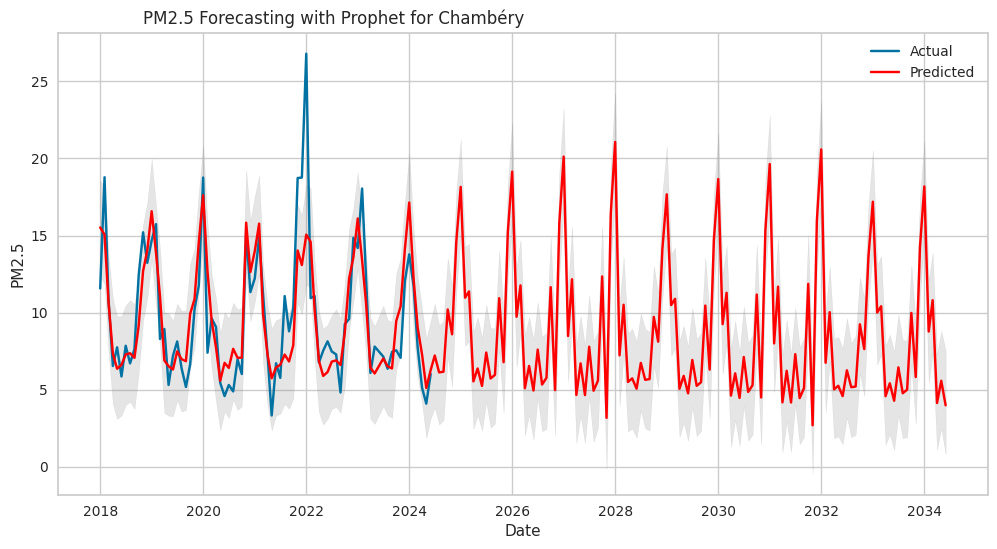

In [105]:
# Plot predictions for a sample city (e.g., the first city in the list)
sample_city = metrics_df.iloc[80]['City']
sample_forecast = all_forecasts_df[all_forecasts_df['City'] == sample_city]

plt.figure(figsize=(12, 6))
plt.plot(model_data[model_data['City'] == sample_city]['ds'], model_data[model_data['City'] == sample_city]['y'], label='Actual')
plt.plot(sample_forecast['ds'], sample_forecast['yhat'], label='Predicted', color='red')
plt.fill_between(sample_forecast['ds'], sample_forecast['yhat_lower'], sample_forecast['yhat_upper'], color='gray', alpha=0.2)
plt.title(f'PM2.5 Forecasting with Prophet for {sample_city}')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.grid(True)
plt.show()


In [113]:
all_forecasts_df = all_forecasts_df[['ds','yhat','City']]

In [117]:
all_forecasts_df.rename(columns={'yhat': 'predicted PM2.5 value','ds':'Date'})

,Date,predicted PM2.5 value,City
0,2018-01-01,11.183821,'s-Gravenhage
1,2018-02-01,13.771468,'s-Gravenhage
2,2018-03-01,13.254854,'s-Gravenhage
3,2018-04-01,11.840359,'s-Gravenhage
4,2018-05-01,9.359590,'s-Gravenhage
...,...,...,...
192,2033-12-31,15.469386,Ústí nad Labem ...
193,2034-01-31,-3.266723,Ústí nad Labem ...
194,2034-02-28,5.490756,Ústí nad Labem ...
195,2034-03-31,4.825436,Ústí nad Labem ...


In [ ]:
import geopy
from geopy.geocoders import Nominatim
import folium
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Define function to get coordinates of a city
def get_coordinates(city_name):
    geolocator = Nominatim(user_agent="city_locator")
    try:
        location = geolocator.geocode(city_name)
        if location:
            return (location.latitude, location.longitude)
        else:
            return (None, None)
    except GeocoderTimedOut:
        return get_coordinates(city_name)


# Extract cities from the DataFrame
cities = all_forecasts_df['City']

# Initialize an empty list to store coordinates
city_coords = []

# Loop through each city and get coordinates
for city_name in cities:
    coordinates = get_coordinates(city_name)
    city_coords.append(coordinates)

# Add the coordinates back to the DataFrame
all_forecasts_df['Coordinates'] = city_coords

# Display the DataFrame with coordinates
print(all_forecasts_df)
